In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.path.abspath(''))  

/home/jakkerman/MSc_CLS/DSK_model_MScThesis/plotting


In [3]:
seed = 1234

In [4]:
filename = f'../results/result_data/agent_data_{seed}.csv'
df_agent = pd.read_csv(filename, index_col='step')
df_agent.head()

""
step
0
1
2
3
4


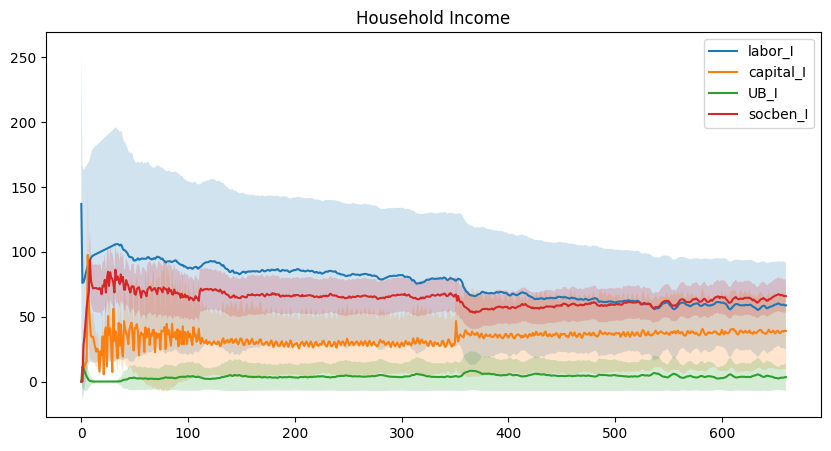

In [5]:
fig = plt.subplots(figsize=(10, 5))

for I_cat in ['labor_I', 'capital_I', 'UB_I', 'socben_I']:

    # Gather data
    I_mean = df[f'mean_{I_cat}_hh'].to_numpy()
    I_std = df[f'std_{I_cat}_hh'].to_numpy()

    # Plot mean and std
    plt.plot(I_mean, label=I_cat)
    plt.fill_between(df.index.to_numpy(), I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.title('Household Income')
plt.legend()
plt.show()

# model data

In [125]:
filename = f'../results/result_data/model_data_{seed}.csv'
df_model = pd.read_csv(filename)
df_model.head()

,CPI_cp,CPI_kp,EI_avg,Exp_UB,GDP,GDP_cp,GDP_growth,GDP_hh,GDP_kp,GINI_I,...,total_Q_growth,total_Q_kp,total_w,unsat_L_demand,unsat_demand,unsat_invest,unspend_C,w_avg,w_req_avg,w_sat_avg
0,100.000000,100.000000,0.0,33915.0,435416.979932,191423.619166,0.000000,262465.728993,-18472.368226,0.408853,...,0.000000,4075.0,304734.305324,0.004806,0.473070,0.000000,0.311618,1.397255,1.320291,1.289835
1,112.229167,142.474797,0.0,29330.0,577637.856472,123870.569028,0.000000,394320.877410,59446.410035,0.318769,...,0.000000,72575.0,303339.751547,0.006257,0.562162,0.628582,0.365535,1.523125,1.312190,1.285124
2,158.791209,127.461114,0.0,23695.0,815551.163026,347901.259382,0.000000,412095.286790,55554.616854,0.309136,...,0.000000,91375.0,312923.662621,0.049331,0.532100,0.364127,0.026724,1.506391,1.309650,1.280568
3,139.850095,122.904712,0.0,19110.0,765161.736124,241403.969672,25.656545,498089.362617,25668.403835,0.281125,...,0.561093,68275.0,321487.875286,0.142185,0.353931,0.094196,0.001793,1.440271,1.306515,1.276181
4,112.938390,122.194922,0.0,18515.0,618175.722188,164253.294959,6.345825,471065.132528,-17142.705298,0.278107,...,0.099826,24425.0,317209.201239,0.123481,0.148264,0.000000,0.000013,1.407961,1.302314,1.272475


In [126]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as smt

In [127]:
# Set parameters for bandpass filters
bk_low = 18
bk_high = 96
bk_K = 36

In [128]:
def plot_ccf(x, y):
    x_filtered = sm.tsa.filters.bkfilter(x[300:], bk_low, bk_high, bk_K)
    y_filtered = sm.tsa.filters.bkfilter(y[300:], bk_low, bk_high, bk_K)

    ccf_back = smt.ccf(x_filtered[::-1], y_filtered[::-1])[1:10][::-1]
    ccf_forw = smt.ccf(x_filtered, y_filtered)[:10]

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3))

    ax1.plot(np.concatenate((ccf_back, ccf_forw)))
    ax1.set_xticks(np.arange(19, step=3), np.arange(-9, 10, step=3))
    ax1.axhline(0, color='black', linestyle='dashed')

    ax2.plot(x_filtered)
    ax2.plot(y_filtered)
    
    plt.tight_layout()
    plt.show()

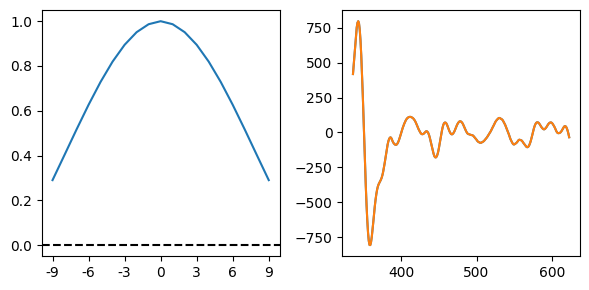

In [129]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.GDP / df_model.CPI_cp
plot_ccf(x, x)

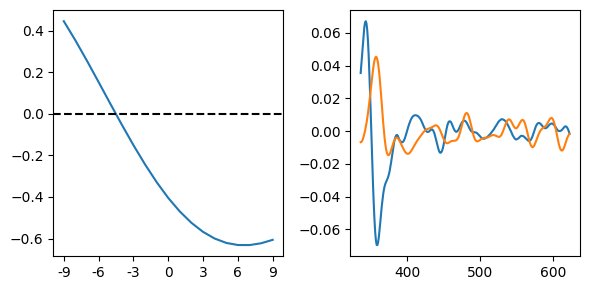

In [130]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.w_avg
plot_ccf(np.log(x), y)

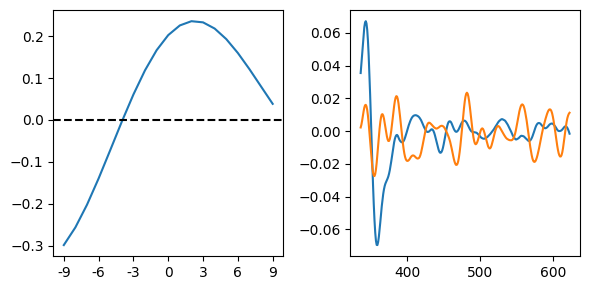

In [131]:
x = df_model.GDP / df_model.CPI_cp
y = 100 * df_model.w_avg / df_model.CPI_cp
plot_ccf(np.log(x), y)

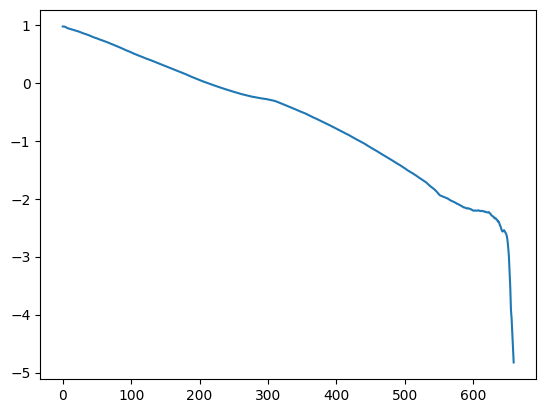

In [13]:
plt.plot(smt.ccf(df_model.w_avg / df_model.CPI_cp, df_model.GDP / df_model.CPI_cp))
plt.show()

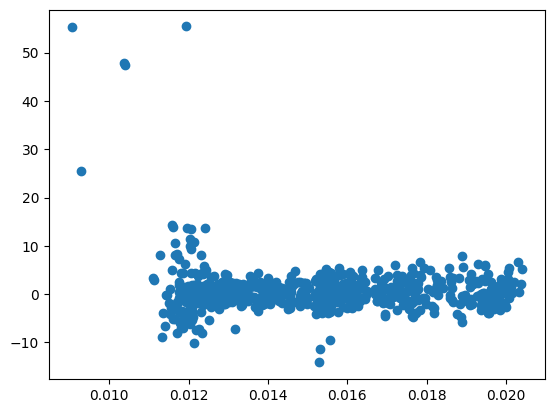

In [15]:
plt.scatter(df_model.w_avg / df_model.CPI_cp, df_model.GDP_growth)
plt.show()